<a href="https://colab.research.google.com/github/gabsgt/Open-Banking_FIAP/blob/main/Income_Analysis_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objetivo
A fim de segmentar as carteiras do banco, vamos prever se o cliente possui ou não receita >50K a partir de seus dados demograficos, através de modelos de classificação.
A premissa é utilizar a menor quantidade de variável possível, considerando as práticas éticas de dados.



### Data Cleaning e Feature Engineering

In [ ]:
!pip install imblearn

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
from google.colab import drive
drive.mount('/content/drive')
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

sns.set()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
url_data = '/content/drive/MyDrive/FIAP - Atividades/Fase 4 - Open Banking/adults_income.zip'
data = pd.read_csv(url_data, compression='zip')
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Apesar de mostrar que o dataset não há valores null, percebe-se que existem campos valores '?' nas variáveis workclass e occupation.

In [ ]:
data['workclass'].unique()

array(['?', 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [ ]:
data['occupation'].unique()

array(['?', 'Exec-managerial', 'Machine-op-inspct', 'Prof-specialty',
       'Other-service', 'Adm-clerical', 'Craft-repair',
       'Transport-moving', 'Handlers-cleaners', 'Sales',
       'Farming-fishing', 'Tech-support', 'Protective-serv',
       'Armed-Forces', 'Priv-house-serv'], dtype=object)

Vamos ver se existem outros valores faltantes em outras variáveis.

In [ ]:
data['age'].unique()

array([90, 82, 66, 54, 41, 34, 38, 74, 68, 45, 52, 32, 51, 46, 57, 22, 37,
       29, 61, 21, 33, 49, 23, 59, 60, 63, 53, 44, 43, 71, 48, 73, 67, 40,
       50, 42, 39, 55, 47, 31, 58, 62, 36, 72, 78, 83, 26, 70, 27, 35, 81,
       65, 25, 28, 56, 69, 20, 30, 24, 64, 75, 19, 77, 80, 18, 17, 76, 79,
       88, 84, 85, 86, 87])

In [ ]:
data['education'].unique()

array(['HS-grad', 'Some-college', '7th-8th', '10th', 'Doctorate',
       'Prof-school', 'Bachelors', 'Masters', '11th', 'Assoc-acdm',
       'Assoc-voc', '1st-4th', '5th-6th', '12th', '9th', 'Preschool'],
      dtype=object)

In [ ]:
data['marital.status'].unique()

array(['Widowed', 'Divorced', 'Separated', 'Never-married',
       'Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [ ]:
data['relationship'].unique()

array(['Not-in-family', 'Unmarried', 'Own-child', 'Other-relative',
       'Husband', 'Wife'], dtype=object)

In [ ]:
data['race'].unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo'], dtype=object)

In [ ]:
data['sex'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
data['native.country'].unique()

array(['United-States', '?', 'Mexico', 'Greece', 'Vietnam', 'China',
       'Taiwan', 'India', 'Philippines', 'Trinadad&Tobago', 'Canada',
       'South', 'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran',
       'England', 'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba',
       'Ireland', 'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic',
       'Haiti', 'El-Salvador', 'Hungary', 'Columbia', 'Guatemala',
       'Jamaica', 'Ecuador', 'France', 'Yugoslavia', 'Scotland',
       'Portugal', 'Laos', 'Thailand', 'Outlying-US(Guam-USVI-etc)'],
      dtype=object)

Encontramos valores faltantes para a variável 'native.country' também. Sendo assim, vamos substituir os valores '?' de todo dataframe para NaN.

In [ ]:
data = data.replace('?', np.nan)
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [ ]:
data.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

De fato, apenas estas 3 variáveis possuem valores faltantes.

In [ ]:
data[data['workclass'].isna()]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
14,51,NaN,172175,Doctorate,16,Never-married,NaN,Not-in-family,White,Male,0,2824,40,United-States,>50K
24,61,NaN,135285,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,2603,32,United-States,<=50K
44,71,NaN,100820,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,2489,15,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32533,35,NaN,320084,Bachelors,13,Married-civ-spouse,NaN,Wife,White,Female,0,0,55,United-States,>50K
32534,30,NaN,33811,Bachelors,13,Never-married,NaN,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32541,71,NaN,287372,Doctorate,16,Married-civ-spouse,NaN,Husband,White,Male,0,0,10,United-States,>50K
32543,41,NaN,202822,HS-grad,9,Separated,NaN,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [ ]:
data[data['workclass'].isna()]['occupation'].unique()

array([nan], dtype=object)

In [ ]:
data[data['occupation'].isna()]['income'].value_counts()

<=50K    1652
>50K      191
Name: income, dtype: int64

Nota-se que os NaN em workclass depende de occupation (como esperado) - tipo MAR (Missing at Random). Sendo assim, podemos afirmar que os valores NaN são de pessoas desempregadas.

In [ ]:
data['occupation'] = data['occupation'].fillna('Unemployed')
data['workclass'] = data['workclass'].fillna('Unemployed')
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Unemployed,77053,HS-grad,9,Widowed,Unemployed,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Unemployed,186061,Some-college,10,Widowed,Unemployed,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [ ]:
data[data['native.country'].isna()]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,NaN,>50K
18,22,Private,119592,Assoc-acdm,12,Never-married,Handlers-cleaners,Not-in-family,Black,Male,0,2824,40,NaN,>50K
65,60,Self-emp-inc,226355,Assoc-voc,11,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,2415,70,NaN,>50K
86,39,Self-emp-not-inc,218490,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,2415,50,NaN,>50K
87,43,Federal-gov,156996,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,2415,55,NaN,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32459,44,Self-emp-inc,71556,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,NaN,>50K
32476,58,Self-emp-inc,181974,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,NaN,<=50K
32498,42,Self-emp-not-inc,217597,HS-grad,9,Divorced,Sales,Own-child,White,Male,0,0,50,NaN,<=50K
32515,39,Private,107302,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,NaN,>50K


Pelo o que parece, os valores NaN em 'native.country' são falta de preenchimento, ou seja, não há relação com outras variáveis. 
Vamos excluir os registros com 'native.country' NaN para não poluir o modelo.

In [ ]:
data.dropna(inplace = True)
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Unemployed,77053,HS-grad,9,Widowed,Unemployed,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Unemployed,186061,Some-college,10,Widowed,Unemployed,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [ ]:
data['native.country'].value_counts(dropna=False)

United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                           29
France                      

Vamos tratar a variável target.

In [ ]:
data.replace('<=50K', 0, inplace=True)
data.replace('>50K', 1, inplace=True)

In [ ]:
data['income'].value_counts(normalize=True)

0    0.759366
1    0.240634
Name: income, dtype: float64

Como 'education.num' é uma forma numérica da coluna 'education', vamos dropar.

In [ ]:
data.drop('education.num', axis = 1,inplace = True)

Vamos simplificar os valores de education, workclass e marital status

In [ ]:
data['education'].value_counts()

HS-grad         10368
Some-college     7187
Bachelors        5210
Masters          1674
Assoc-voc        1366
11th             1167
Assoc-acdm       1055
10th              921
7th-8th           627
Prof-school       559
9th               506
12th              417
Doctorate         390
5th-6th           318
1st-4th           163
Preschool          50
Name: education, dtype: int64

In [ ]:
hs_grad = ['HS-grad','11th','10th','9th','12th']
elementary = ['1st-4th','5th-6th','7th-8th']

data['education'].replace(hs_grad,'HighSchool-grad', inplace=True)
data['education'].replace(elementary,'elementary_school', inplace=True)

data['education'].value_counts()

HighSchool-grad      13379
Some-college          7187
Bachelors             5210
Masters               1674
Assoc-voc             1366
elementary_school     1108
Assoc-acdm            1055
Prof-school            559
Doctorate              390
Preschool               50
Name: education, dtype: int64

In [ ]:
data['workclass'].value_counts()

Private             22286
Self-emp-not-inc     2499
Local-gov            2067
Unemployed           1809
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [ ]:
self_employed = ['Self-emp-not-inc','Self-emp-inc']
govt_employees = ['Local-gov','State-gov','Federal-gov']

data['workclass'].replace(to_replace = self_employed ,value = 'Self_employed',inplace = True)
data['workclass'].replace(to_replace = govt_employees,value = 'Govern_employees',inplace = True)

data['workclass'].value_counts()

Private             22286
Govern_employees     4289
Self_employed        3573
Unemployed           1809
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [ ]:
data['marital.status'].value_counts()

Married-civ-spouse       14692
Never-married            10488
Divorced                  4394
Separated                 1005
Widowed                    979
Married-spouse-absent      397
Married-AF-spouse           23
Name: marital.status, dtype: int64

In [ ]:
married= ['Married-spouse-absent','Married-civ-spouse','Married-AF-spouse']
separated = ['Separated','Divorced']

data['marital.status'].replace(to_replace = married ,value = 'Married',inplace = True)
data['marital.status'].replace(to_replace = separated,value = 'Separated',inplace = True)

data['marital.status'].value_counts()

Married          15112
Never-married    10488
Separated         5399
Widowed            979
Name: marital.status, dtype: int64

In [ ]:
data['sex'].replace('Male', 0, inplace=True)
data['sex'].replace('Female', 1, inplace=True)
data['sex'].value_counts()

0    21370
1    10608
Name: sex, dtype: int64

In [ ]:
data['fnlwgt'] = pd.to_numeric(data['fnlwgt'])

In [ ]:
data.drop(['fnlwgt', 'capital.gain', 'capital.loss', 'hours.per.week', 'native.country', 'sex', 'race', 'relationship'], axis = 1,inplace = True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31978 entries, 0 to 32560
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             31978 non-null  int64 
 1   workclass       31978 non-null  object
 2   education       31978 non-null  object
 3   marital.status  31978 non-null  object
 4   occupation      31978 non-null  object
 5   income          31978 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 1.7+ MB


Transformando as variáveis categóricas em números para poder rodar o algoritmo.

In [ ]:
data_f = pd.get_dummies(data)
data_f.head() 

,age,income,workclass_Govern_employees,workclass_Never-worked,workclass_Private,workclass_Self_employed,workclass_Unemployed,workclass_Without-pay,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HighSchool-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,education_elementary_school,marital.status_Married,marital.status_Never-married,marital.status_Separated,marital.status_Widowed,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,occupation_Unemployed
0,90,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,82,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,66,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,54,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,41,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
data_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31978 entries, 0 to 32560
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   age                           31978 non-null  int64
 1   income                        31978 non-null  int64
 2   workclass_Govern_employees    31978 non-null  uint8
 3   workclass_Never-worked        31978 non-null  uint8
 4   workclass_Private             31978 non-null  uint8
 5   workclass_Self_employed       31978 non-null  uint8
 6   workclass_Unemployed          31978 non-null  uint8
 7   workclass_Without-pay         31978 non-null  uint8
 8   education_Assoc-acdm          31978 non-null  uint8
 9   education_Assoc-voc           31978 non-null  uint8
 10  education_Bachelors           31978 non-null  uint8
 11  education_Doctorate           31978 non-null  uint8
 12  education_HighSchool-grad     31978 non-null  uint8
 13  education_Masters             3

In [ ]:
print(data.shape)
data.describe().transpose()

(31978, 6)


,count,mean,std,min,25%,50%,75%,max
age,31978.0,38.579023,13.662085,17.0,28.0,37.0,48.0,90.0
income,31978.0,0.240634,0.427475,0.0,0.0,0.0,0.0,1.0


Antes de aplicar qualquer modelo de ML, vamos ver se a variável está balanceada. Caso não esteja, teremos um problema que o algoritmo aprenderá muito mais com a classe que tem mais variável (income = 0).

0    24283
1     7695
Name: income, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


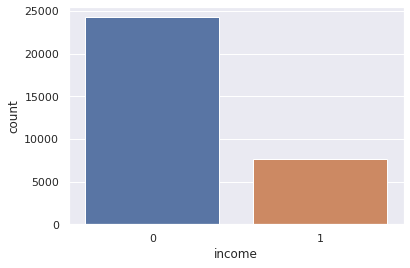

In [ ]:
print(data_f['income'].value_counts())
sns.countplot('income', data=data_f)
plt.show()

A fim de teste, vamos rodar o modelo de Regressão Logística nos dados desbalanceados.

### Oversampling

In [ ]:
x = data_f.drop('income', axis = 1)
y = data_f.income

In [ ]:
np.bincount(y)

array([24283,  7695])

In [ ]:
smt = SMOTE()

In [ ]:
x, y = smt.fit_sample(x, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


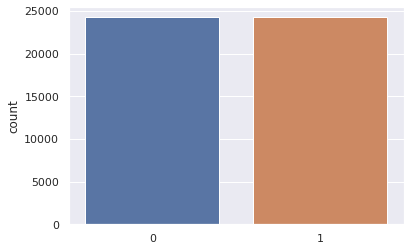

In [ ]:
ax = sns.countplot(x=y)

In [ ]:
kfold = KFold(n_splits=5, random_state=0, shuffle=True)
lr = LogisticRegression()
results = cross_val_score(lr, x, y, cv=kfold)
print(results)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[0.81830348 0.82693298 0.82652116 0.82147637 0.82260887]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 82.317% (0.323%)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 1, stratify=y)

In [ ]:
lr.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = lr.predict(x_test)

In [ ]:
print(accuracy_score(y_test, y_pred))

0.8239169823752265


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82      6071
           1       0.80      0.86      0.83      6071

    accuracy                           0.82     12142
   macro avg       0.83      0.82      0.82     12142
weighted avg       0.83      0.82      0.82     12142



In [ ]:
print(pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predito'], margins=True))

Predito     0     1    All
Real                      
0        4812  1259   6071
1         879  5192   6071
All      5691  6451  12142
